In [3]:
from wdm.configuration.mask import PerlinNoiseConfig
from wdm.utils.masking import generate_perlin_mask_with_contour_smoothing
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [31]:
config = PerlinNoiseConfig(
    scale=45,
    octaves=6,
    persistence=0.3,
    lacunarity=3.5,
    threshold=0.6,
    sigma=1,
    per_sample=1
)

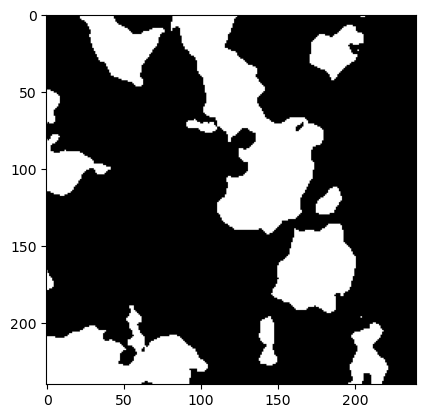

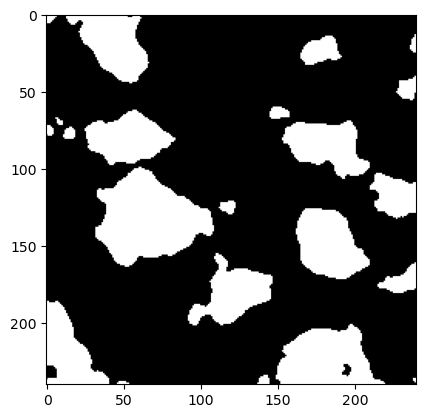

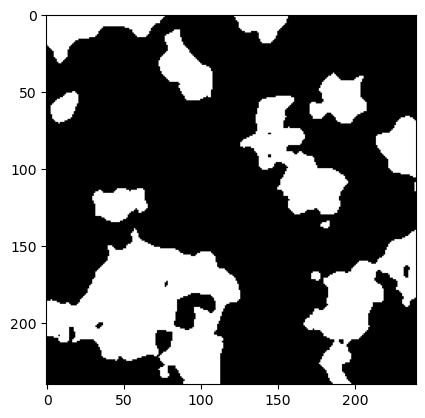

KeyboardInterrupt: 

In [32]:
for i in range(5):
    mat = generate_perlin_mask_with_contour_smoothing((240,240,240), **config.to_dict(), seed=i)
    plt.imshow(mat[...,120], cmap="grey")
    plt.show()

In [5]:
import os

def create_masks(mask_config: PerlinNoiseConfig, img_size, dir, name="mask_{i}", n_samples=10, K=200):
    for i in tqdm(range(n_samples)):
        while True:
            threshold = np.random.uniform(0.5, 0.6, size=None)
            mask_config.threshold = threshold
            mask: np.ndarray = generate_perlin_mask_with_contour_smoothing(img_size, **mask_config.to_dict(), seed=i)
            h,w,d = img_size.shape
            central_region = mask[K:h-K, K:w-K, K:d-K]
            if np.sum(central_region)>K*3*0.05:
                if not os.path.exists(dir):
                    os.makedirs(dir)
                np.save(os.path.join(dir, name.format(i=i)), mask)
                break

In [6]:
create_masks(config, (240,240,240), "/Users/kingpowa/Documents/Programming/masks")